In [38]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from numpy.linalg import norm
from scipy.interpolate import UnivariateSpline
from sklearn.decomposition import PCA
from datetime import date

import asyncio
import math
import os
import sys
import time
sys.path.append("C:\\Users\\Sam Yu\\Documents\\GitHub\\LiquidCrystals\\src")

from LiquidCrystalSystem import LCSystem
from features import create_feature_vectors_from_snapshot

In [39]:
def get_config(r):
    
    if r == 0:
        particle_no_index = 3
        confinement = "Circle"
    else:
        particle_no_index = 4
        confinement = "Annulus"
    
    config = {"R": 25,
              "r": r,
              "b": 5,
              "a": 0.25,
              "confinement": confinement,
              "datasets_path": f"C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\datasets\\r={r}",
              "vis_path": f"C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\visualizations\\r={r}",
              "particle_no_index": particle_no_index}
    
    return config

In [40]:
run_config = get_config(r=0)

print(f"{run_config}\n")

globals().update(run_config)
    
# particle numbers
Ns = sorted([int(_path_.split("_")[particle_no_index]) for _path_ in os.listdir(datasets_path)])

print(f"Particle numbers: {Ns}")

{'R': 25, 'r': 0, 'b': 5, 'a': 0.25, 'confinement': 'Circle', 'datasets_path': 'C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\datasets\\r=0', 'vis_path': 'C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\visualizations\\r=0', 'particle_no_index': 3}

Particle numbers: [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]


1., particle number: 20 -> density: 0.0400
2., particle number: 25 -> density: 0.0500
3., particle number: 30 -> density: 0.0600
4., particle number: 35 -> density: 0.0700
5., particle number: 40 -> density: 0.0800
6., particle number: 45 -> density: 0.0900
7., particle number: 50 -> density: 0.1000
8., particle number: 55 -> density: 0.1100
9., particle number: 60 -> density: 0.1200
10., particle number: 65 -> density: 0.1300
11., particle number: 70 -> density: 0.1400
12., particle number: 75 -> density: 0.1500
13., particle number: 80 -> density: 0.1600
14., particle number: 85 -> density: 0.1700
15., particle number: 90 -> density: 0.1800
16., particle number: 95 -> density: 0.1900
17., particle number: 100 -> density: 0.2000
18., particle number: 105 -> density: 0.2100
19., particle number: 110 -> density: 0.2200
20., particle number: 115 -> density: 0.2300
21., particle number: 120 -> density: 0.2400
22., particle number: 125 -> density: 0.2500
23., particle number: 130 -> densit

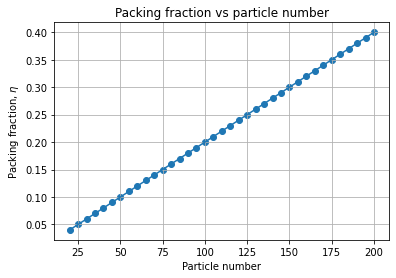

In [41]:
# Create the results directory for specified inner radius
base_results_path = f"C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\results"
results_path = os.path.join(base_results_path, f"r={r}")

if not os.path.exists(results_path):
    os.makedirs(results_path, exist_ok=True)
    
# Path for run at (number of features, number of samples)
num_of_features = 2
num_of_samples = 10

run_path = os.path.join(results_path, f"features_{num_of_features}_samples_{num_of_samples}")

if not os.path.exists(run_path):
    os.mkdir(run_path)
    

#### Plot the packing fractions with respect to particle number ####

# convert to densities
densities = [(N*a*b/(R**2-r**2)) for N in Ns]

for i, N in enumerate(Ns):
    print(f"{i+1}., particle number: {Ns[i]} -> density: {densities[i]:.4f}")

# Plot the packing fractions w.r.t particle number
with plt.ioff():
    fig, ax = plt.subplots()
    
ax.plot(Ns, densities)
ax.scatter(Ns, densities)
ax.set_xlabel("Particle number")
ax.set_ylabel(r"Packing fraction, $\eta$")
ax.set_title("Packing fraction vs particle number")
ax.grid()

fig.savefig(os.path.join(results_path, "packing_fraction_particles_no.png"))

plt.show()

plt.close(fig)

##### End plotting #####

In [42]:
systems = dict()

for _path_ in os.listdir(datasets_path):
    
    full_path = os.path.join(datasets_path, _path_, 'instanceRun')
    
    # Simulation summary notes exists
    if os.path.exists(os.path.join(full_path, f"MonteCarlo_{confinement}_SimNotes.txt")):
        
        lc = LCSystem(lc_data_path=full_path, confinement=confinement)
        num_of_particles = lc.sim_params['# of Ellipse']
        systems[num_of_particles] = lc
    
    # Simulation summary notes DNE
    else:
        
        lc = LCSystem(lc_data_path=full_path, confinement=confinement)
        lc.sim_params["R"] = R
        lc.sim_params["r"] = r
        lc.sim_params["Semi Major Axis"] = b
        lc.sim_params["Semi Minor Axis"] = a
        
        num_of_particles = lc.sim_params["# of Ellipse"]
        
        systems[num_of_particles] = lc

# remove outliers
#systems = {N:systems[N] for N in systems.keys() if N > 65 and N < 210}

print(f"Inner radius value: {r}")
for i, N in enumerate(sorted(list(systems.keys()))):
    print(f"Particle number: {N}, max step: {max(systems[N].snapshots.keys())}")

Inner radius value: 0
Particle number: 20, max step: 2000000.0
Particle number: 25, max step: 2000000.0
Particle number: 30, max step: 2000000.0
Particle number: 35, max step: 2000000.0
Particle number: 40, max step: 2000000.0
Particle number: 45, max step: 2000000.0
Particle number: 50, max step: 2000000.0
Particle number: 55, max step: 2000000.0
Particle number: 60, max step: 2000000.0
Particle number: 65, max step: 2000000.0
Particle number: 70, max step: 2000000.0
Particle number: 75, max step: 2000000.0
Particle number: 80, max step: 2000000.0
Particle number: 85, max step: 2000000.0
Particle number: 90, max step: 2000000.0
Particle number: 95, max step: 2000000.0
Particle number: 100, max step: 2000000.0
Particle number: 105, max step: 2000000.0
Particle number: 110, max step: 2000000.0
Particle number: 115, max step: 2000000.0
Particle number: 120, max step: 2000000.0
Particle number: 125, max step: 2000000.0
Particle number: 130, max step: 2000000.0
Particle number: 135, max st

Conventional order parameter definition: $\Lambda = \sqrt{S^2 + T^2} = [(\frac{1}{N}\sum_{i=1}^{N}\cos(2\theta_i))^2 + (\frac{1}{N}\sum_{i=1}^{N}\sin(2\theta_i))^2]^{1/2}$

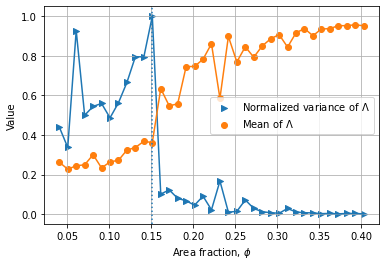

Inner radius value: 2
Critical value for phase transition using nematic OP: 0.15096618357487923
Critical particle number for phase transition: 75


In [7]:
# Analysis using nematic order parameter Lambda

area_fractions = []
lambda_means = []
lambda_variances = []
particle_numbers = []

for particle_number in sorted(systems.keys()):
    
    if not 20 <= particle_number <= 200:
        continue
    
    cosines = []
    sines = []
    system_state_at_mc_step = systems[particle_number].snapshots
    
    ensemble = []
    for mc_step in system_state_at_mc_step.keys():

        if 1000000 <= mc_step <= 2000000:

            pos_array = system_state_at_mc_step[mc_step]
            thetas = np.array([coord[-1] for coord in pos_array])

            # averaging over a single configuration
            cosine = np.mean([np.cos(2*theta) for theta in thetas])
            sine = np.mean([np.sin(2*theta) for theta in thetas])

            ensemble.append(np.sqrt(cosine**2 + sine**2))
    
    # ensemble statistics for area fraction
    area_fractions.append(particle_number*a*b/(R**2-r**2))
    particle_numbers.append(particle_number)
    lambda_variances.append(np.var(ensemble))
    lambda_means.append(np.mean(ensemble))

critical_value = area_fractions[np.argmax(lambda_variances)]
critical_number = particle_numbers[np.argmax(lambda_variances)]
lambda_variances = lambda_variances / max(lambda_variances)
plt.scatter(area_fractions, lambda_variances, marker=">", label=r"Normalized variance of $\Lambda$")
plt.plot(area_fractions, lambda_variances)
plt.scatter(area_fractions, lambda_means, label=r"Mean of $\Lambda$")
plt.plot(area_fractions, lambda_means)
plt.grid()
plt.legend()
plt.axvline(critical_value, linestyle=":")
plt.xlabel("Area fraction, $\phi$")
plt.ylabel("Value")
plt.title("")

plt.show()
plt.close()

print(f"Inner radius value: {r}")
print(f"Critical value for phase transition using nematic OP: {critical_value}")
print(f"Critical particle number for phase transition: {critical_number}")

In [ ]:
rs = [0, 2, 4, 10]
r_vals = np.arange(0, 10, 0.1)
critical_area_fractions = [0.19, 0.15096618357487923, 0.15096618357487923, 0.10714285714285714]

from scipy.optimize import curve_fit
def func(x, a, b, c, d):
    return a*np.exp(-b*(x-c))+d

popt, pcov = curve_fit(func, rs, critical_area_fractions, [1, 1, 1, 1])
print(f"Fit parameters: {popt}")

plt.plot(r_vals, func(r_vals, *popt), linestyle=":", label="exponential fit")
plt.scatter(rs, critical_area_fractions, s=50, label="phase boundary points")
plt.xlabel(r"Inner radius, $r$")
plt.ylabel(r"Area fraction, $\phi$")
plt.ylim([0, 0.8])
plt.legend()
plt.show()

plt.close()

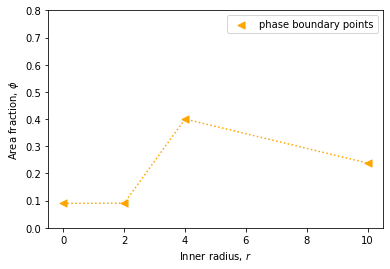

In [31]:
rs = [0, 2, 4, 10]
critical_area_fractions_pca = [0.0900, 0.0906, 0.4002, 0.2381]

plt.scatter(rs, critical_area_fractions_pca, s=50, label="PCA boundary points", marker="<", color="orange")
plt.plot(rs, critical_area_fractions_pca, linestyle=":", color="orange")
plt.scatter(rs, critical_area_fractions, s=50, label="$\Lambda$ boundary points", marker=">", color="blue")
plt.plot(r_vals, func(r_vals, *popt), linestyle=":", label="$\Lamb$boundary")
plt.xlabel(r"Inner radius, $r$")
plt.ylabel(r"Area fraction, $\phi$")
plt.ylim([0, 0.8])
plt.legend()
plt.show()
plt.close()

In [ ]:
system = systems[110]

fig = system.plot_snapshot(1499999, color_angles=True)
new_title = fig.axes[0].get_title() + " "
fig.axes[0].set_title("Foo")
plt.show(fig)
plt.close()

cosines = []
sines = []

for step in sorted(list(system.snapshots.keys())):
    
    if 0 <= step <= 2000000:
        
        snapshot = system.snapshots[step]

        cosine = np.mean([np.cos(2*theta) for theta in thetas])
        sine = np.mean([np.sin(2*theta) for theta in thetas])
        
        cosines.append(cosine)
        sines.append(sine)

        print(f"Step: {step}, Cosine: {cosine}, Sine: {sine}")

    avg_cosine = np.mean(cosines)
    avg_sine = np.mean(sines)

    print(f"Average cosine over all snapshots: {avg_cosine}")
    print(f"Average sine over all snapshots: {avg_sine}")

    order_param = np.sqrt(avg_cosine**2 + avg_sine**2)
    print(f"Order parameter: {order_param}")

In [ ]:
def background(f):
    def wrapped(*args, **kwargs):
        return asyncio.get_event_loop().run_in_executor(None, f, *args, **kwargs)
    
    return wrapped

In [ ]:
vis_path = f"C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\visualizations\\r={r}"
if not os.path.exists(vis_path):
    os.mkdir(vis_path)
if not os.path.exists(os.path.join(vis_path, "method")):
    os.mkdir(os.path.join(vis_path, "method"))

In [ ]:
# Visualize how the feature function chooses
# also plot the snapshots

@background
def demonstrate_method_parallel(N):

    lc_system = systems[N]

    # maximally equilibrated step
    step_number = max(lc_system.snapshots.keys())

    # save folder
    save_folder = os.path.join(vis_path, "method", f"N={N}")
    os.makedirs(save_folder, exist_ok=True)

    # input coordinates
    input_coords = lc_system.snapshots[step_number]

    # feature vectors and coordinates of feature particles
    fvs, ncs = create_feature_vectors_from_snapshot(input_coords, num_features=15, num_samples=10)
    
    # mean feature
    f_bar = np.mean([np.mean(fv) for fv in fvs])

    # plot neighbors
    with plt.ioff():
        for i, probe in enumerate(list(ncs.keys())):
            particles_to_plot = [probe] + ncs[probe]
            fig = lc_system.plot_snapshot(step_number, extra_particles=particles_to_plot)

            fig.savefig(os.path.join(save_folder, f"mean_{np.mean(fvs[i])}_N_{N}_figure_{i}.png"))
            plt.close(fig)

for N in systems.keys():
    demonstrate_method_parallel(N)

In [ ]:
def demonstrate_method(N, step, nf, save_folder):
    
    lc_system = systems[N]
    
    step_number = max(lc_system.snapshots.keys())
    
    input_coords = lc_system.snapshots[step]
    
    fvs, ncs = create_feature_vectors_from_snapshot(input_coords, num_features=nf, num_samples=3)
    
    with plt.ioff():
        for i, probe in enumerate(list(ncs.keys())):
            particles_for_plot = [probe] + ncs[probe]
            fig = lc_system.plot_snapshot(step, extra_particles=particles_for_plot)
            plt.title("")
            plt.xticks([])
            plt.yticks([])
            fig.savefig(os.path.join(save_folder, f"N_{N}_figure_{i}.png"))
            plt.close(fig)

save = os.path.join("C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\visualizations\\r=10", "report")
os.makedirs(save, exist_ok=True)
demonstrate_method(N=35, step=999999, nf=8, save_folder=os.path.join(save))

In [ ]:
# plot all the snapshots

def plot_all_snapshots(N, path, start=0, end=2000000):
    
    if not os.path.exists(os.path.join(path, "plots")):
        os.mkdir(os.path.join(path, "plots"))
    
    lc_system = systems[N]
    
    save_folder = os.path.join(path, "plots", f"N={N}")
    os.makedirs(save_folder, exist_ok=True)

    # snapshots
    with plt.ioff():
        for step in lc_system.snapshots.keys():
            if start <= step <= end:
                # plot the snapshot and color the angles
                fig = lc_system.plot_snapshot(step, color_angles=True)
                fig.savefig(os.path.join(save_folder, f"N_{N}_step_{step}.png"))
                plt.close(fig)
    
for N in systems.keys():
    plot_all_snapshots(N, vis_path)

In [ ]:
plot_all_snapshots(40, vis_path)

In [ ]:
import threading

print(threading.active_count())

In [ ]:
# phase diagram

rs = [0, 2, 6, 10, 14]

densities = []
for rp in rs:
    txt_path = os.path.join(base_results_path, f"r={rp}", "phase_transition_IN.txt")
    with open(txt_path, "r") as in_file:
        density = float(in_file.readline().strip().split(" ")[-1])
        densities.append(density)

with plt.ioff():
    fig, ax = plt.subplots()
    
ax.plot(rs, densities, linestyle="dotted", label="Phase boundary")
ax.scatter(rs, densities, marker="v", label="PCA critical densities")
ax.set_xlabel(r"inner radius $r$")
ax.set_ylabel(r"packing fraction $\eta$")
ax.set_xlim(0, 22)
ax.set_ylim(0, 0.7)
ax.set_title("PCA identified phase boundary")
ax.legend()

plt.show(fig)
plt.close(fig)

In [ ]:
print(pca.n_features_)
print(pca.n_samples_)

In [ ]:
# Clustering in theta space

lc_system_example = systems[135]

fig = lc_system_example.plot_snapshot(119999)
plt.show(fig)

In [ ]:
coordinates = lc_system_example.snapshots[119999]

# long axis angle
thetas = (coordinates[:, -1] % np.pi)
# system angle
phis = np.arctan2(coordinates[:, 1], coordinates[:, 0]) * (180 / np.pi)

fig, ax = plt.subplots()
ax.scatter(thetas, phis, s=3.5)

ax.set_xlabel(r"Long axis angle, $\theta$")
ax.set_ylabel(r"System angle, $\phi$")
ax.set_title("Theta space")
plt.show()
plt.close()

In [9]:
from features import create_data_matrix
from utilities import get_feature_func, get_nearest_neighbor_func

print(sorted(systems.keys()))
print(len(systems.keys()))

[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250]
47


In [43]:
dm, ss = create_data_matrix(systems,
                            min_particles=20, max_particles=200, 
                            num_of_features=10, num_of_samples=5,
                            feature_func=get_feature_func("relative_orientation"),
                            neighbor_func=get_nearest_neighbor_func("euclidean_distance"),
                            start=1000000, end=1500000, save_path=None, verbose=False)

(50787, 20)
[-1.0000000e+00 -1.9972504e-08  2.2209861e-08 -5.6205863e-08
 -4.4195986e-08  3.4578420e-08 -1.5926832e-07 -1.3188561e-08
 -4.3065938e-08  1.8019136e-08 -5.2673045e-08 -1.3816799e-07
  3.4241469e-07  1.0377059e-07  5.9715120e-08 -1.9969856e-07
 -2.5786892e-07  3.3034695e-08 -1.5333388e-08 -5.6886520e-08]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



d


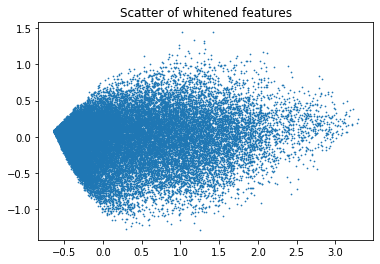

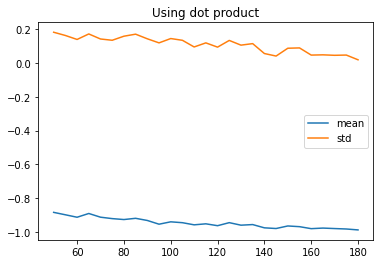

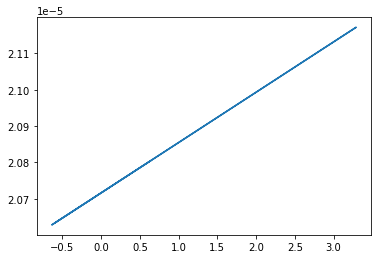

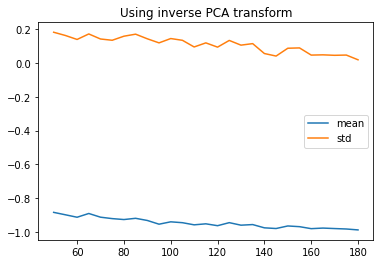

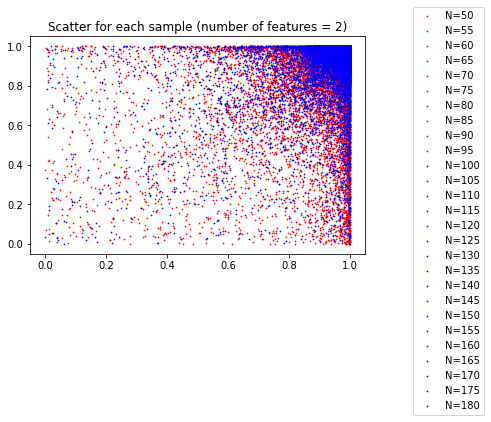

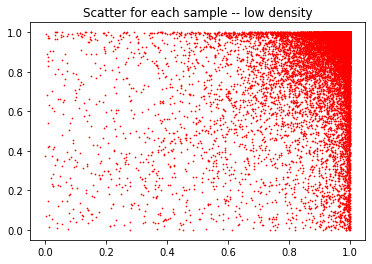

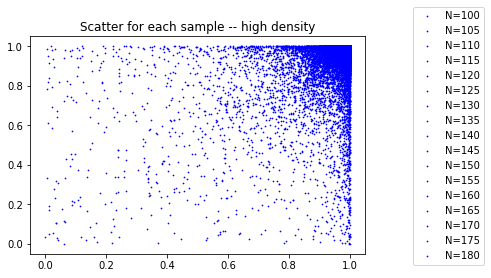

In [25]:
print(dm.shape)

dm_copy = dm.copy()

# subtract the column mean
dm_copy[:, 0] = dm_copy[:, 0] - np.mean(dm_copy[:, 0])
dm_copy[:, 1] = dm_copy[:, 1] - np.mean(dm_copy[:, 1])

pca_whiten = PCA()
pca_whiten.fit(dm_copy)
whitened = pca_whiten.transform(dm_copy)

plt.scatter(whitened[:,0], whitened[:,1], s=0.5)

pca = PCA(n_components=2)
pca.fit(whitened)
plt.title("Scatter of whitened features")
print(-pca.components_[0])

#for length, w in zip(pca.explained_variance_, pca.components_):
#    v = w * np.sqrt(length) / 2
#    v = -v
#    plt.arrow(*(pca.mean_), *(pca.mean_ + v), length_includes_head=True,
#              head_width=0.05, head_length=0.05)

#plt.plot(range(len(pca.components_[0])), pca.components_[0])

w1 = -pca.components_[0]
means = []
stds = []
for particle_number in sorted(ss):
    fvs = ss[particle_number]
    scores = np.array([w1 @ vec for vec in fvs])
    avg = np.mean(scores)
    std = np.std(scores)
    means.append(avg)
    stds.append(std)

# plotting PCA statistics using simple dot product
fig1, ax1 = plt.subplots()
ax1.plot(sorted(ss), means, label="mean")
ax1.plot(sorted(ss), stds, label="std")
ax1.set_title("Using dot product")
ax1.legend()

fig2, ax2 = plt.subplots()
pca2 = PCA(n_components=1)
pca2.fit(whitened)
data_pca = pca2.transform(whitened)
data_new = pca2.inverse_transform(data_pca)
ax2.plot(data_new[:,0], data_new[:,1])
ax2.set_title("")

# calculating PCA statistics using transform
means2 = []
stds2 = []
for particle_number in sorted(ss):
    fvs = ss[particle_number]
    minibatch = np.stack(fvs, axis=0)
    data_minibatch = pca2.transform(minibatch)
    means2.append(np.mean(data_minibatch))
    stds2.append(np.std(data_minibatch))

# plotting PCA statistics using the transform
fig3, ax3 = plt.subplots()
ax3.plot(sorted(ss), -np.array(means2), label="mean")
ax3.plot(sorted(ss), np.array(stds2), label="std")
ax3.set_title("Using inverse PCA transform")
ax3.legend()

Inner radius value: 0
Semi-major axis: 5
Semi-minor axis: 0.25


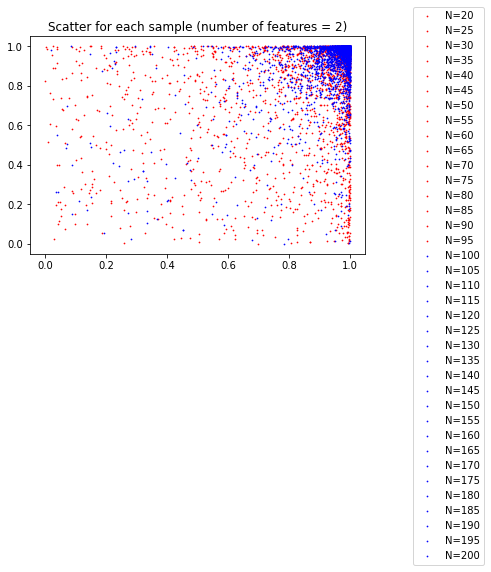

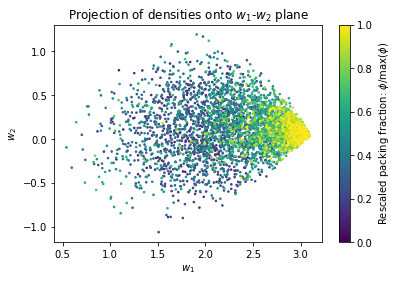

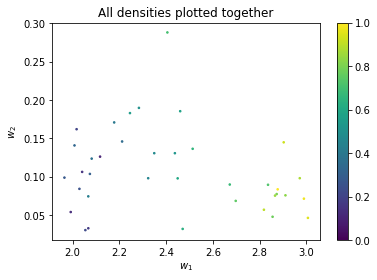

In [59]:
from matplotlib.cm import get_cmap
color_map = get_cmap('viridis')

print(f"Inner radius value: {r}")
print(f"Semi-major axis: {b}")
print(f"Semi-minor axis: {a}")

dm_copy = dm.copy()

pca = PCA()
pca.fit(dm_copy)

w1 = -pca.components_[0]
w2 = -pca.components_[1]

fig4, ax4 = plt.subplots()
for particle_number in sorted(ss):
    fvs = ss[particle_number]
    minibatch = np.stack(fvs, axis=0)
    if particle_number < 100:
        ax4.scatter(minibatch[:,0], minibatch[:,1], s=0.5, label=f"N={particle_number}", color="red")
    else:
        ax4.scatter(minibatch[:,0], minibatch[:,1], s=0.5, label=f"N={particle_number}", color="blue")
ax4.set_title("Scatter for each sample (number of features = 2)")
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=fig4.transFigure)

#fig5, ax5 = plt.subplots()
fig6, ax6 = plt.subplots()
fig7, ax7 = plt.subplots()

# scatter onto first two principal components
w1_proj_means = []
w2_proj_means = []
w1_proj_raw = []
w2_proj_raw = []
color_list = []
raw_color_list = []
max_density = 0.4000
for particle_number in sorted(ss):
    rescaled_density = (particle_number * 0.25 * 5 / R**2) / max_density
    fill_color = color_map(rescaled_density)
    color_list.append(fill_color)
    fvs = ss[particle_number]
    w1_projections = []
    w2_projections = []
    for fv in fvs:
        w1_projections.append(w1 @ fv)
        w2_projections.append(w2 @ fv)
    
    raw_color_list += [fill_color for i in range(len(fvs))]
    w1_proj_raw += w1_projections
    w2_proj_raw += w2_projections

    w1_proj_means.append(np.mean(w1_projections))
    w2_proj_means.append(np.mean(w2_projections))
        
#ax5.set_title("Datapoints from N=20 to N=100")
#ax5.set_xlabel(r"$w_1$")
#ax5.set_ylabel(r"$w_2$")
#fig.colorbar()
#ax6.set_title("Datapoints from N=105 to N=200")
#ax6.set_xlabel(r"$w_1$")
#ax6.set_ylabel(r"$w_2$")
#plt.colorbar()

marker_size = 2.5

scattered = ax6.scatter(w1_proj_raw, w2_proj_raw, s=marker_size, c=raw_color_list)
ax6.set_title(r"Projection of densities onto $w_1$-$w_2$ plane")
ax6.set_xlabel(r"$w_1$")
ax6.set_ylabel(r"$w_2$")
cbar = plt.colorbar(scattered, ax=ax6)
cbar.ax.set_ylabel(r"Rescaled packing fraction: $\phi/\max(\phi)$")

scattered = ax7.scatter(w1_proj_means, w2_proj_means, s=marker_size, c=color_list)
ax7.set_title("All densities plotted together")
ax7.set_xlabel(r"$w_1$")
ax7.set_ylabel(r"$w_2$")
plt.colorbar(scattered, ax=ax7)